<a href="https://colab.research.google.com/github/bbberylll/ESAA_OB/blob/main/ESAA_OB_F1%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CH.4 _ 모델 훈련

작동 방식을 알아야 적절한 모델, 올바른 훈련 알고리즘, 적절한 하이퍼파라미터를 찾을 수 있다.


### 최적화 방식
1. 경사 하강법 (GD)
2. 배치 경사 하강법
3. 미니 배치 경사 하강법
4. 확률적 경사 하강법 (SGD)


### 모델 훈련 방식 목차
1. 선형회귀
2. 다항 회귀  --> 파라미터가 더 많아 과대적합 되기 쉬움. * *탐지필요* *
3. 과대적합 감소시킬 수 있는 규제 기법

## 4.1 _ 선형 회귀

모델을 훈련시킨다는 것 = RMSE(MSE)를 최소화하는 파라미터를 찾는 것
** 이 파라미터를 찾기 위해 여러가지 최적화 방법을 사용하는 것

MSE cost function = sum[(예측값 - 실제값)^2]/m

** **
*** ***

###    θ를 구하는 방법
1) **여러 파라미터를 구해. 이 파라미터를 이용한 모델을 만들어. 그리고 그 모델을 통해 예측값을 계산해. 그리고 위에 나와 있는 MSE cost function으로 MSE를 계산해. 그 중 가장 작은 MSE를 나타내는 모델의 파라미터가 가장 적절한 파라미터가 되는 것**

** **

2) **정규방정식을 이용한 방법**

   θ=(XTX)−1XTy : 이 공식을 이용해 구할 수 있음 --> 코드에서 적용 가능

** **

3) **유사역행렬을 이용한 방법**

   θ=X†Y

   역행렬은 full rank인 square matrix에서만 정의가 됨.
   따라서 정규방정식을 이용하면 θ를 구하지 못하는 경우가 생김
   
   --> 이를 보완하는 것이 유사역행렬.
   
       1. X를 SVD를 이용해 3개의 행렬 곱으로 분해
       2. 알고리즘과 여러 방법을 이용해 X†를 계산해줌


    유사역행렬은 계산 방식이 효율적이고 극단적인 행렬에도 적용이 가능하므로 유용하다.

** **

4) 내장 모듈 함수를 이용한 구현
  1. sklearn.linear_model import LinearRegression의 fit, predict 함수
  2. scipy.linalg.lstsq() 함수 -- 위의 공식을 이용하지 않고 유사역행렬을 이용함. **무어-펜로즈 역행렬**

    1). 위의 역행렬은 np.linalg.pinv() 함수를 이용해 확인할 수 있음

**LinearRegression 클래스는 무어-펜로즈 역행렬을 기반으로 함**

## 4.2 _ 경사하강법   -- SGDRegressor

### Gradient Descent
= 최적의 해법을 찾을 수 있는 최적화 알고리즘
**by Minimizing Cost Function**

θ에 대한 Cost Function의 현재 Gradient를 계산 -> G의 감소 방향을 찾아 내려가고 G=0이 되는 지점을 찾음.

**Gradient = 미분값*

** **
### 경사하강법 주요 파라미터
1. 학습률 = learning rate : Step의 크기
2. grdient : Step의 방향

** **
** **
### 경사하강법의 문제점과 선형회귀에서의 해결법
1. Problem_1 : Global min과 local min의 문제
  
    a) Sol_1.1 : 선형회귀에서의 MSE cost function은 Global min만이 존재함

    b) Sol_1.2 : 선형회귀에서의 MSE cost function은 연속함수고 기울기가 갑자기 변하지 않음

** **

2. Problem_2 : 각 특성의 Scale이 다를 경우
    모델 훈련의 측면에서 시간이 오래 걸리는 단점이 있음
    **StandardScaler를 이용해 모든 특성의 Scal을 통일해야 함**
    

** **
** **

### 경사하강법의 구현

**θ로 MSE Cost Function을 편미분해야 함**

  1. 배치 경사 하강법 : 전체 훈련 세트 X에 대해 계산
      1) 적절한 학습률을 찾는게 중요함 --> Grid Search 사용 + 알고리즘 반복 횟수를 제한해야 함

      2) 적절한 해결법 : 반복 횟수를 크게 지정 + *Gradient Vector가 작아지면 알고리즘 중지

          **벡터의 노름이 어떤 허용오차보다 작아지면 중지함*


  2. 확률적 경사 하강법 **SGD** : 전체 훈련 세트가 아닌 random한 샘플 선택 -- 속도 UP

    a. 요동치면서 감소함 + local Min을 벗어날 수 있게 도와줌
    b. Global Min에 도달하지 못할 수 있음
    c. 학습률을 점진적으로 감소시키면서 b의 문제를 해결 - 학습 스케줄 함수를 이용해서 학습률을 결정    **담금질 기법**
    d. 샘플을 랜덤하게 선택하기 때문에 전체 세트의 모든 샘플을 한 번은 선택하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞는 방법 사용

  3. 미니배치 경사 하강법 : 미니배치라는 샘플에 대해 Gradient를 계산

    a. 행렬 연산에 최적화된 하드웨어(GPU)를 사용해 얻는 성능 향상.
    b. SGD보다 불규칙한 정도가 낮음
    -


## 4.3_다항회귀

비선형 데이터를 학습하는데 사용하는 방법

## 4.4_ 학습 곡선
과대 적합과 과소 적합 그 중간의 어딘가여야 함.

학습 곡선을 확인해서 모델 성능을 확인함!

# 코드

In [1]:
import numpy as np

X = 2*np.random.rand(100,1)     ## 100×1 형태의 배열을 만들고, 각 원소는 0 이상 1 미만의 실수 난수
y = 4+3*X+np.random.rand(100,1)

In [2]:
X_b = np.c_[np.ones((100,1)),X]            ## 모든 샘플에 x0=1을 추가한 것
                                          ## np.ones((x,y)) : x*y 행렬인데 원소가 모두 1
                                          ## np.c_[X1, X2] : 열 단위로 X1과 X2를 붙이는 것  -- column_stack의 줄임말
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
                                          ## np.linalg = 넘파이 선형대수 모듈
                                          ## inv() = 역행렬 구해주는 함수  &  A.dot(B) = A*B의 의미

In [3]:
theta_best

array([[4.4812561 ],
       [3.00538127]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.4812561 ],
       [10.49201863]])

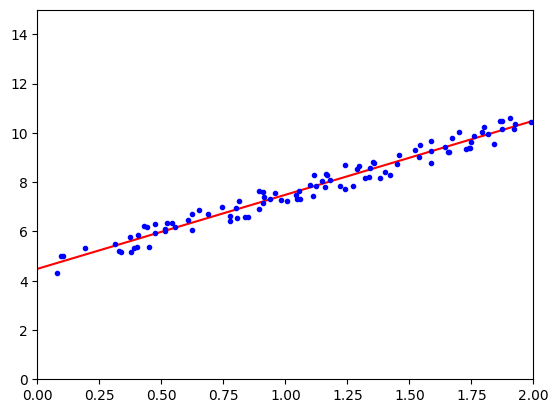

In [5]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])    ## xmin~xmax & ymin~ymax를 설정해주는 함수
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.4812561] [[3.00538127]]
[[ 4.4812561 ]
 [10.49201863]]


In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.4812561 ],
       [3.00538127]])

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[4.4812561 ],
       [3.00538127]])

### 경사 하강법 알고리즘 구현

In [9]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta = theta -eta*gradients

In [10]:
theta

array([[4.4812561 ],
       [3.00538127]])

### 확률적 경사 하강법 구현

In [11]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)    # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]

    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta - eta*gradients

In [12]:
theta

array([[4.46696469],
       [3.00265147]])

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())      ## ravel 다차원 배열을 1차원 배열로 평평하게 펴주는 함수

SGDRegressor(eta0=0.1, penalty=None)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.44865438]), array([3.01035657]))

### 다항회귀

In [15]:
m = 100
X = 6*np.random.rand(m, 1)-3
y = 0.5 *X**2 + X+2 + np.random.randn(m,1)

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)     ## 특성간의 모든 교차항을 추가함!
X_poly = poly_features.fit_transform(X)
print(X[0])

X_poly[0]

[2.3417452]


array([2.3417452 , 5.48377059])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.19732529]), array([[1.0639321 , 0.47109267]]))

### 학습 곡선

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
  train_errors, val_errors = [], []

  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)

    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")


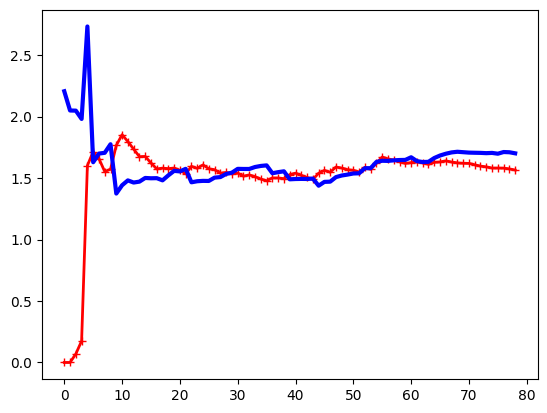

In [21]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

모델에 훈련 샘플이 추가됨에 따라 검증 오차가 천천히 감소함

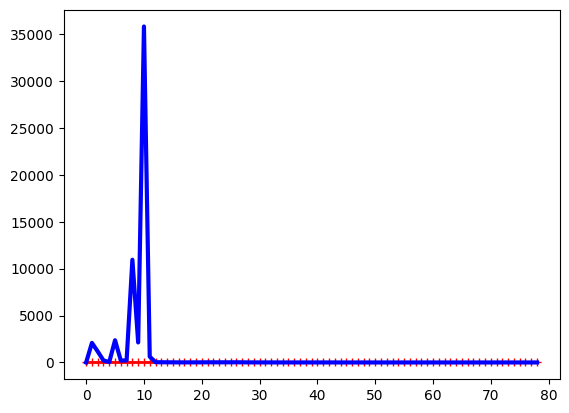

In [22]:
from multiprocessing import Pipe
from sklearn.pipeline import Pipeline

polynomial_regressin = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regressin, X,y)

훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다
두 곡선 사이의 공간이 있다는 것은 훈련 데이터 세트에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 것. 과대적합 모델의 특징임.

화요일 : 4.1~4.2 절반   P.171까지
수요일 : 4.2 절반 ~ 4.3
목요일 : 4.4 끝내기


https://yoon-private.tistory.com/201

https://dev.to/amananandrai/a-deep-dive-into-linear-regression-3-way-implementation-3jb


https://faculty.washington.edu/sbrunton/me565/pdf/L28secure.pdf


https://darkpgmr.tistory.com/106 --> SVD 관련 내용